# Using Tensorboard with Pytorch
> A short tutorial on using Tensorboard with Pytorch

- toc: true 
- badges: true
- comments: true
- categories: [pytorch, tensorboard]
- image: images/chart-preview.png

## Library imports

In [28]:
import matplotlib.pyplot as plt
import random

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn as nn
import torch.nn.functional as F

## Data loading

In order to simplify data loading [PyTorch](https://pytorch.org) provides two dataloading utilities: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` which are very useful both with pre-loaded datasets and your own data. 

> "Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples"

In this tutorial we will use a pre-loaded datasets (MNIST) that subclass `torch.utils.data.Dataset`.

In [2]:
# Training data
train = datasets.MNIST(root='data', 
                       train=True,
                       download=True,
                       transform=ToTensor()
)

# Test data
test = datasets.MNIST(root='data',
                      train=False,
                      download=True,
                      transform=ToTensor()
)

## Data visualization
Let's have a look at the data we have just loaded using a helper function to plot a grid with randomly selected samples from one of the two datasets (training / test) that we have just loaded.

In [26]:
def plot_images_grid(dataset, rows=4, cols=4):
    width = cols * 2
    height = cols * 2    
    fig = plt.figure(figsize=(width, height))
    for i in range(1, rows * cols + 1):
        # get a random index and obtain image and label
        idx = random.randint(0, len(dataset)-1)
        img, label = dataset[idx]
        
        fig.add_subplot(rows, cols, i)
        plt.title(label, {'fontsize': 16, 'color': 'blue'})
        plt.axis('off')
        plt.imshow(img.squeeze(), cmap='gray')
        
    plt.show()        

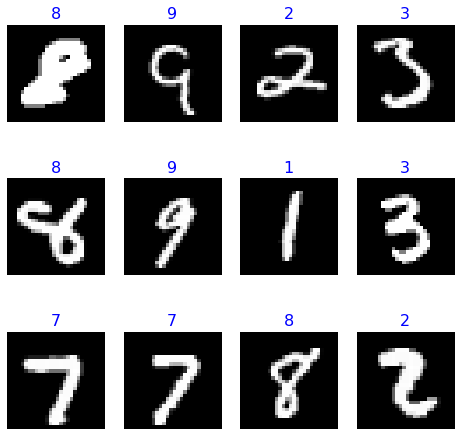

In [27]:
plot_images_grid(test, 3, 4)

## Model definition
Now, we can define a simple model to recognize the digits in MNIST 

In [29]:
class Digits(nn.Module):
    def __init__(self):
        super(Digits, self).__init__()
        
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3)                
        self.conv_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(in_features=32*6*6, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, x):
        x = self.maxpool(F.relu(self.conv_1(x)))
        x = self.maxpool(F.relu(self.conv_2(x)))
        x = x.view(-1, 32 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [30]:
model = Digits()